#LOADING PACKAGES

In [1]:
import pandas as pd 
import matplotlib as plt
import seaborn as sys

LOADING DATA

In [26]:
df_hehave=pd.read_csv("C:\\Users\\nisha\\OneDrive\\Desktop\\FORAGE-PROJECT\\QUANTIUM-PROJECT\\QVI_purchase_behaviour.csv")

In [27]:
df_trans=pd.read_excel("C:\\Users\\nisha\\OneDrive\\Desktop\\FORAGE-PROJECT\\QUANTIUM-PROJECT\\QVI_transaction_data.xlsx")

MERGING BOTH THE DATA

In [6]:
df=pd.merge(df_hehave,df_trans,on="LYLTY_CARD_NBR")

 DATA CHECKING AND PERFORMED DATA CLEANING

In [7]:
df.isnull().sum()

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
DATE                0
STORE_NBR           0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
dtype: int64

In [44]:
df.duplicated().sum()

np.int64(0)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   LYLTY_CARD_NBR    264836 non-null  int64  
 1   LIFESTAGE         264836 non-null  object 
 2   PREMIUM_CUSTOMER  264836 non-null  object 
 3   DATE              264836 non-null  int64  
 4   STORE_NBR         264836 non-null  int64  
 5   TXN_ID            264836 non-null  int64  
 6   PROD_NBR          264836 non-null  int64  
 7   PROD_NAME         264836 non-null  object 
 8   PROD_QTY          264836 non-null  int64  
 9   TOT_SALES         264836 non-null  float64
dtypes: float64(1), int64(6), object(3)
memory usage: 20.2+ MB


In [ ]:
df.head()

In [ ]:
df.describe()

In [ ]:
df.shape

(264836, 10)

In [12]:
df.drop_duplicates(inplace=True)

CHANGING DATE FORMAT IN PANDAS FROM EXCEL

In [14]:
df["DATE"]=pd.to_datetime(df["DATE"],unit="D",origin="1899-12-30")

checking the quantity

In [ ]:
df[df["PROD_QTY"]>1]

In [21]:
df["unit_price"]=df["TOT_SALES"]/df["PROD_QTY"]

In [29]:
df.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,unit_price,PACK_SIZE,BRAND
0,1000,YOUNG SINGLES/COUPLES,Premium,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,3.0,175.0,Natural
1,1002,YOUNG SINGLES/COUPLES,Mainstream,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,2.7,150.0,Red
2,1003,YOUNG FAMILIES,Budget,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,3.6,210.0,Grain
3,1003,YOUNG FAMILIES,Budget,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,3.0,175.0,Natural
4,1004,OLDER SINGLES/COUPLES,Mainstream,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,1.9,160.0,WW


#FEATURE ENGINEERING

In [32]:
df['PACK_SIZE'] = df['PROD_NAME'].str.extract(r'(\d+)[gG]').astype(float)
df['BRAND'] = df['PROD_NAME'].str.split().str[0]

#MATRICS

In [35]:
segment_semmary=df.groupby(["PREMIUM_CUSTOMER","LIFESTAGE"]).agg(
total_sale=("TOT_SALES","sum"),
avg_sale_per_transaction=("TOT_SALES","mean"),
total_transation=("TXN_ID","count"),
avg_packsize=("PACK_SIZE","mean"),
avg_price_unit=("unit_price","mean")
).reset_index()

SAVE TO CSV

In [36]:
segment_semmary.to_csv("segment_semmary", index=False)

#SORTING DATA FROM LOWEST TO HIGHEST

In [45]:
sorted_segment_data=segment_semmary.sort_values(by="total_sale",ascending=True)

In [46]:
sorted_segment_data.head()

,PREMIUM_CUSTOMER,LIFESTAGE,total_sale,avg_sale_per_transaction,total_transation,avg_packsize,avg_price_unit
15,Premium,NEW FAMILIES,11491.10,7.231655,1589,181.286973,3.871743
8,Mainstream,NEW FAMILIES,17013.90,7.317806,2325,181.699355,3.916581
1,Budget,NEW FAMILIES,21928.45,7.297321,3005,181.161730,3.919251
0,Budget,MIDAGE SINGLES/COUPLES,35514.80,7.074661,5020,180.187450,3.728496
20,Premium,YOUNG SINGLES/COUPLES,41642.10,6.629852,6281,181.056042,3.645518


"totl spend by lifestage and premium customer type

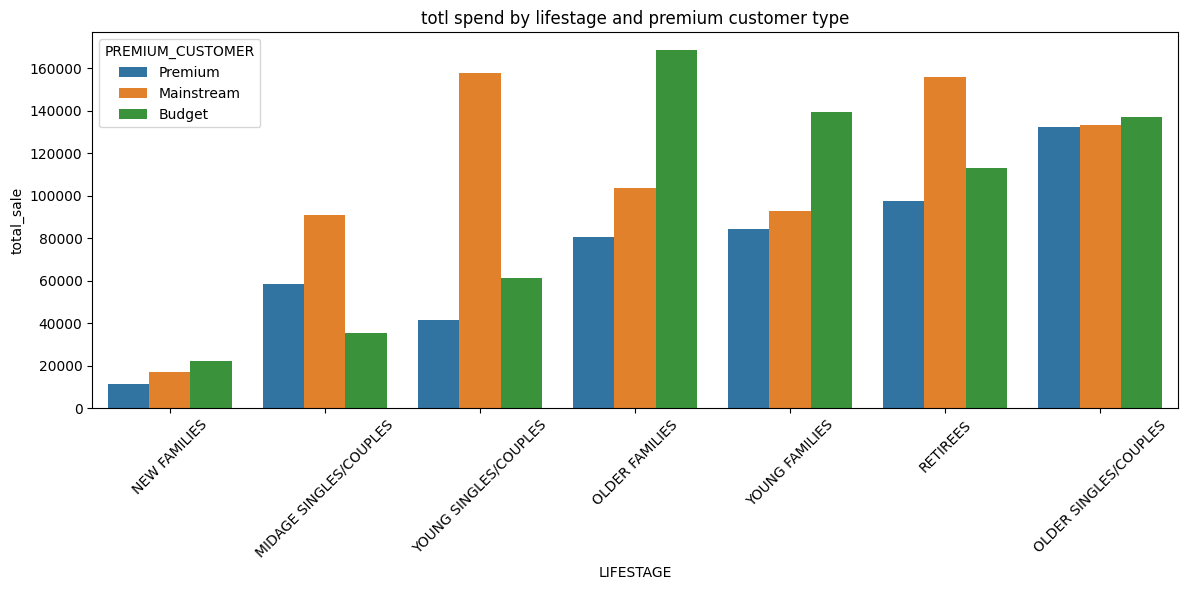

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.barplot(data=sorted_segment_data,x="LIFESTAGE",y="total_sale",hue="PREMIUM_CUSTOMER")
plt.title("totl spend by lifestage and premium customer type")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

segment spend per unit

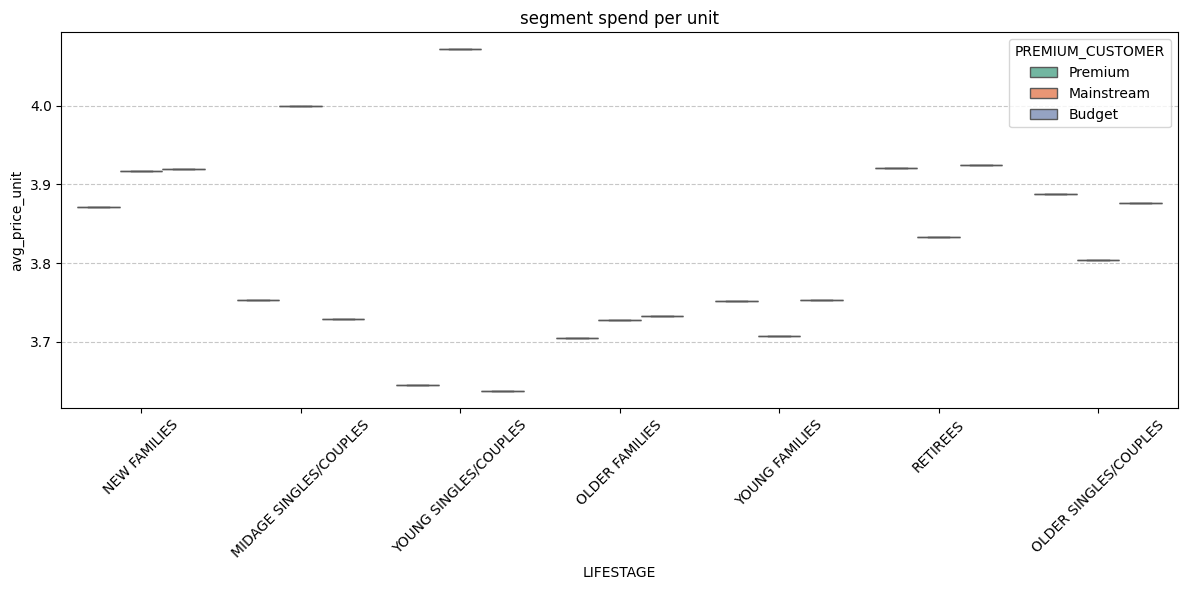

In [54]:
plt.figure(figsize=(12,6))
sns.boxplot(data=sorted_segment_data,x="LIFESTAGE",y="avg_price_unit",hue="PREMIUM_CUSTOMER",palette="Set2")
plt.title("segment spend per unit")
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Weekly Chip Sales Over Time

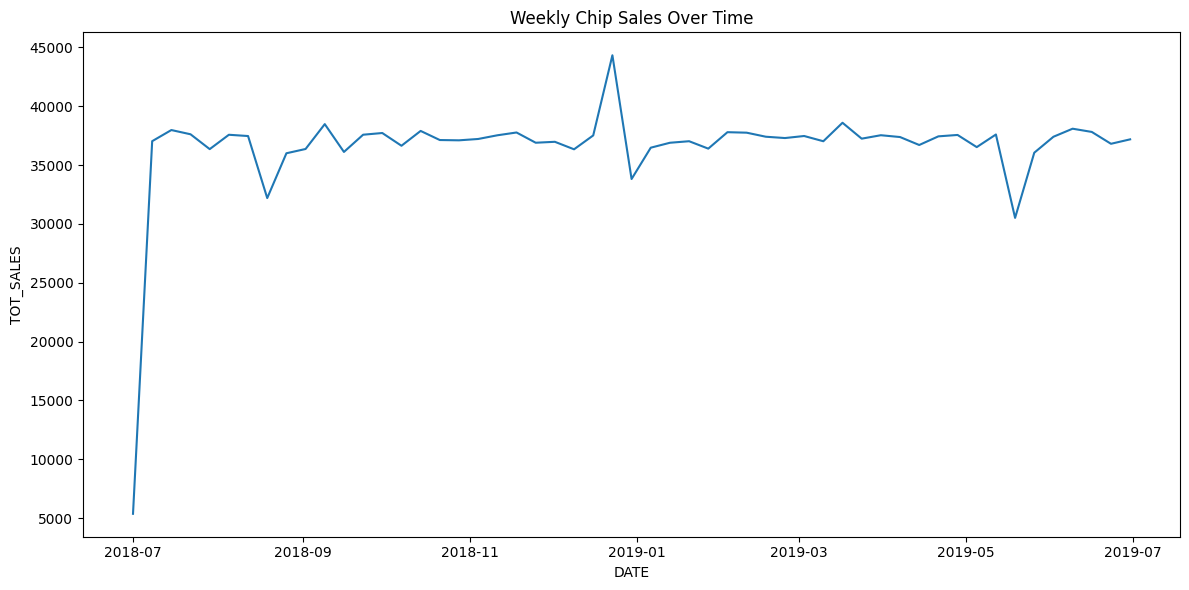

In [65]:


# Group by week
weekly_sales = df.groupby(pd.Grouper(key='DATE', freq='W'))['TOT_SALES'].sum().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(data=weekly_sales, x='DATE', y='TOT_SALES')
plt.title('Weekly Chip Sales Over Time')
plt.tight_layout()
plt.show()


Top 10 Brands by Sales

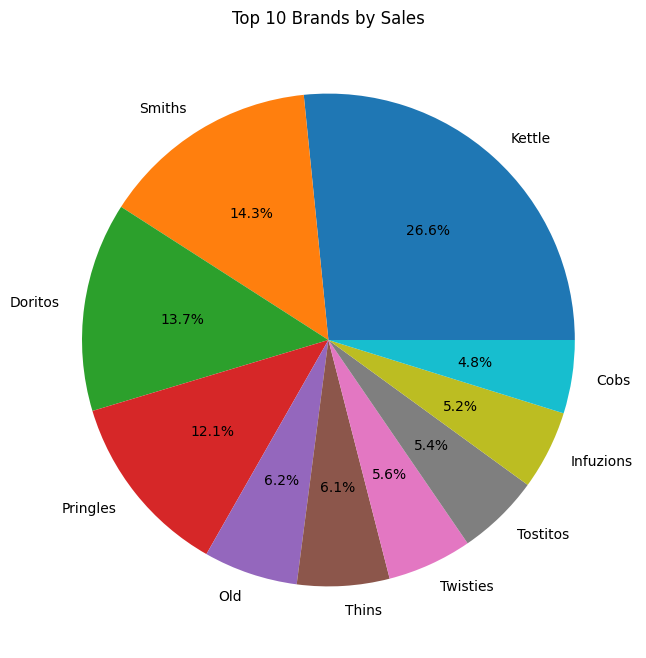

In [64]:
brand_sales = df.groupby('BRAND')['TOT_SALES'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(8,8))
brand_sales.plot.pie(autopct='%1.1f%%')
plt.title('Top 10 Brands by Sales')
plt.ylabel('')
plt.show()
